# Estimacion de produccion de Aceite y Gas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas_profiling

font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams[u'figure.figsize'] = (16,12)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         }
# plt.style.use('seaborn-poster')
plt.style.use('ggplot')

#import sys
#sys.path.append('../serch_tools/')
#import serch_tools as st


In [2]:
aforos = pd.read_csv("aforos.csv")
analisis_fluidos = pd.read_csv("Analisis_fluidos.csv")
columna_geologica = pd.read_csv('columna_geologica.csv')
datos_generales_pozos = pd.read_csv('datos_generales_de_pozos.csv')
eval_petrofisica = pd.read_csv('eval_petrofisica.csv')
intervalo_disparado = pd.read_csv('IntervalosDisparados.csv')
parametros_petrofisicos = pd.read_csv('parametros_petrofisicos.csv')

In [3]:
reserva = pd.read_csv('reservas_2014.csv',nrows=3) # solo tiene 3 registros y muchos nulos

In [4]:
reserva

,index,REGION,ACTIVO,CAMPO,YACIMIENTO,CATEGORIA,FECHA_DE_CERTIFICACION_(dd/mm/aaaa),VOLUMEN_ORIGINAL_ACEITE_(mmb),VOLUMEN_ORIGINAL_GAS_NATURAL_(mmmpc),VOLUMEN_ORIGINAL_CONDENSADO_(mmb),...,FACTOR_DE_VOLUMEN_DEL_ACEITE@PRESION_INICIAL _(bls@cy/bls@cs),RELACION_CONDENSADO_GAS_(mb/mmpc),FACTOR_DE_VOLUMEN_DEL_GAS@PRESION_INICIAL_(pc@cy/pc@cs),RELACION_INICIAL_GAS_DISUELTO/ACEITE_ORIGINAL_ (mmpc/mb),FACTOR_DE_ENCOGIMIENTO_POR_LICUABLES_EN_EL_TRANSPORTE,FACTOR_DE_ENCOGIMIENTO_POR_IMPUREZAS,FACTOR_DE_ENCOGIMIENTO_LICUABLES_EN_PLANTA,FACTOR_DE_RECUPERACION _DE_CONDENSADO_(b/mpc),FACTOR_DE_RECUPERACION_DE_LIQUIDO_EN_PLANTA_(b/mpc),FACTOR_DE_EQUIVALENCIA_DEL_GAS_A_LIQUIDO_(b/mpc)
0,0,SPRS,APCP,Moloacán,Mioceno,1P,41640,221.70173,121.935952,0.0,...,1.127,NaN,NaN,0.549989,1,1,0.834292,0,0.106724,0.192273
1,1,SPRS,APCP,Moloacán,Mioceno,2P,41640,221.70173,121.935952,NaN,...,1.127,0.0,0.0,0.549989,1,1,0.834292,0,0.106724,0.192273
2,2,SPRS,APCP,Moloacán,Mioceno,3P,41640,221.70173,121.935952,0.0,...,1.127,NaN,0.0,0.549989,1,1,0.834292,0,0.106724,0.192273


In [5]:
prod_mens = pd.read_csv('produccion_mensual.csv')
prod_mens.head()

,index,NOMBRE_DEL_POZO,CIMA_INTERVALO_(md),BASE_INTERVALO_(md),CONDICION_DE_FLUJO_(Fluyente/SAP),FECHA_DE_LA_PRODUCCION_(dd/mm/aaaa),RELACION_GAS_LIQUIDO_(m3/m3),RELACION_GAS_ACEITE_(m3/m3),CORTE_DE_AGUA_(bl/bl),SALINIDAD_(PPM),...,RELACION_CONDENSADO_GAS_(m3/m3),RELACION_AGUA_GAS_(m3/m3),RELACION_AGUA_CONDENSADO_(m3/m3),FRACCION_DEL_SEDIMENTO,DIAMETRO_DEL_ESTRANGULADOR _(in),VOLUMEN_DE_ACEITE_(m3),VOLUMEN_DE_GAS_(m3),VOLUMEN_DE_CONDENSADO_(m3),DIAS_DE_PRODUCCION,DESCRIPCION_DE_LA_PRODUCCION
0,0,MOLOACAN-102A,SIN INFORMACION,SIN INFORMACION,SAP,01/10/2013,101.175571,203.152074,50.205197,SIN INFORMACION,...,NO APLICA,0.004962,NO APLICA,NO APLICA,NO APLICA,31.803914,6462.078342,NO APLICA,31,SIN INFORMACION
1,1,MOLOACAN-102A,SIN INFORMACION,SIN INFORMACION,SAP,01/11/2013,100.298703,203.279313,50.667656,SIN INFORMACION,...,NO APLICA,0.005052,NO APLICA,NO APLICA,NO APLICA,29.536942,6005.222347,NO APLICA,30,SIN INFORMACION
2,2,MOLOACAN-102A,SIN INFORMACION,SIN INFORMACION,SAP,01/12/2013,101.159166,203.859067,50.385933,SIN INFORMACION,...,NO APLICA,0.004981,NO APLICA,NO APLICA,NO APLICA,30.852725,6290.627114,NO APLICA,31,SIN INFORMACION
3,3,MOLOACAN-102A,SIN INFORMACION,SIN INFORMACION,SAP,01/01/2014,101.316590,203.424976,50.202687,SIN INFORMACION,...,NO APLICA,0.004955,NO APLICA,NO APLICA,NO APLICA,31.774044,6464.681785,NO APLICA,31,SIN INFORMACION
4,4,MOLOACAN-102A,SIN INFORMACION,SIN INFORMACION,SAP,01/02/2014,101.316590,203.424976,50.202687,SIN INFORMACION,...,NO APLICA,0.004955,NO APLICA,NO APLICA,NO APLICA,28.699137,5839.067419,NO APLICA,28,SIN INFORMACION


In [6]:
prod_mens.columns

Index(['index', 'NOMBRE_DEL_POZO', 'CIMA_INTERVALO_(md)',
       'BASE_INTERVALO_(md)', 'CONDICION_DE_FLUJO_(Fluyente/SAP)',
       'FECHA_DE_LA_PRODUCCION_(dd/mm/aaaa)', 'RELACION_GAS_LIQUIDO_(m3/m3)',
       'RELACION_GAS_ACEITE_(m3/m3)', 'CORTE_DE_AGUA_(bl/bl)',
       'SALINIDAD_(PPM)', 'RELACION_AGUA_ACEITE_(m3/m3)',
       'RELACION_CONDENSADO_GAS_(m3/m3)', 'RELACION_AGUA_GAS_(m3/m3)',
       'RELACION_AGUA_CONDENSADO_(m3/m3)', 'FRACCION_DEL_SEDIMENTO',
       'DIAMETRO_DEL_ESTRANGULADOR _(in)', 'VOLUMEN_DE_ACEITE_(m3)',
       'VOLUMEN_DE_GAS_(m3)', 'VOLUMEN_DE_CONDENSADO_(m3)',
       'DIAS_DE_PRODUCCION ', 'DESCRIPCION_DE_LA_PRODUCCION '],
      dtype='object')

In [7]:
prod_mens.groupby(['NOMBRE_DEL_POZO'])['FECHA_DE_LA_PRODUCCION_(dd/mm/aaaa)'].count().median()

121.0

In [8]:
prod_mens['fecha_produccion'] = pd.to_datetime(prod_mens['FECHA_DE_LA_PRODUCCION_(dd/mm/aaaa)'], 
                                               format="%d/%m/%Y")

In [9]:
prod_mens['fecha_produccion'].describe()

count                   20821
unique                    187
top       1999-01-01 00:00:00
freq                      156
first     1999-01-01 00:00:00
last      2014-07-01 00:00:00
Name: fecha_produccion, dtype: object

En algunos posos tenemos un historico de 1999 hasta 2014

Text(0, 0.5, 'Produccion promedio')

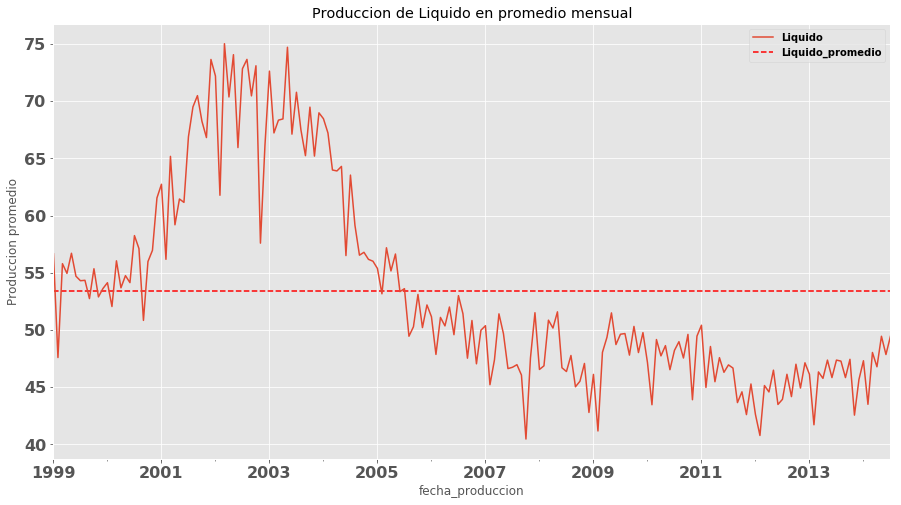

In [10]:
prod_mens.groupby('fecha_produccion').mean()['VOLUMEN_DE_ACEITE_(m3)'].plot(figsize=(15,8), 
                                                             title='Produccion de Liquido en promedio mensual')
mi,ma = plt.xlim()
plt.hlines(prod_mens.groupby('fecha_produccion').mean()['VOLUMEN_DE_ACEITE_(m3)'].mean(),
           mi, ma, color='r', linestyles='--')
plt.legend(['Liquido','Liquido_promedio'])
plt.ylabel('Produccion promedio')

Text(0, 0.5, 'Produccion promedio')

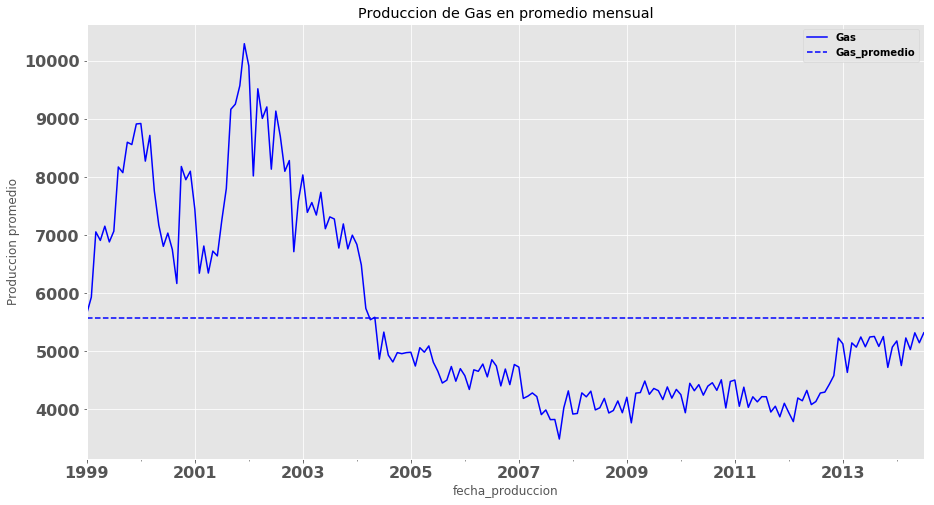

In [11]:
prod_mens.groupby('fecha_produccion').mean()['VOLUMEN_DE_GAS_(m3)'].plot(figsize=(15,8), 
                                                             title='Produccion de Gas en promedio mensual'
                                                            ,color='b')
mi,ma = plt.xlim()
plt.hlines(prod_mens.groupby('fecha_produccion').mean()['VOLUMEN_DE_GAS_(m3)'].mean(),
           mi, ma, color='b', linestyles='--')
plt.legend(['Gas','Gas_promedio'])
plt.ylabel('Produccion promedio')

120 Mediciones por plataforma en promedio tenemos

Text(0, 0.5, 'Produccion total en $10^3$')

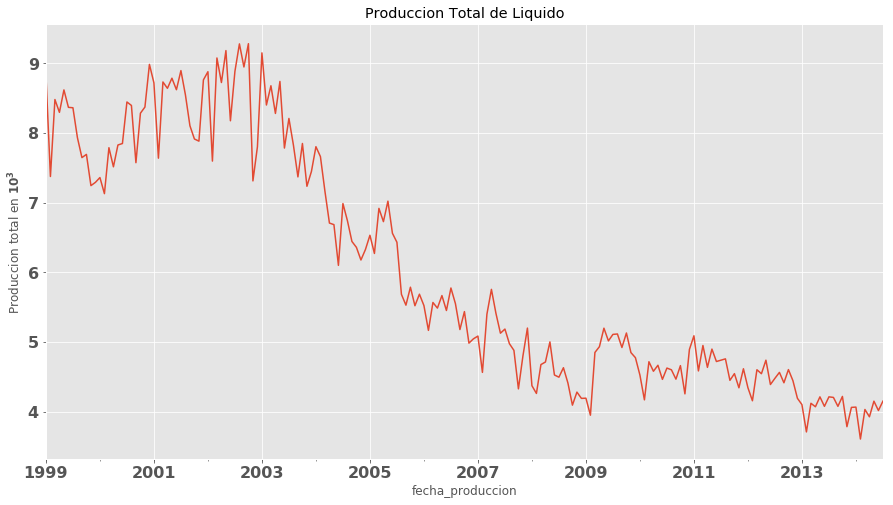

In [12]:
prod_total_liq = prod_mens.groupby('fecha_produccion')['VOLUMEN_DE_ACEITE_(m3)'].sum() / 1e3
prod_total_liq.plot(figsize=(15,8), title='Produccion Total de Liquido')
plt.ylabel('Produccion total en $10^3$')

Text(0, 0.5, 'Produccion total en $10^5$')

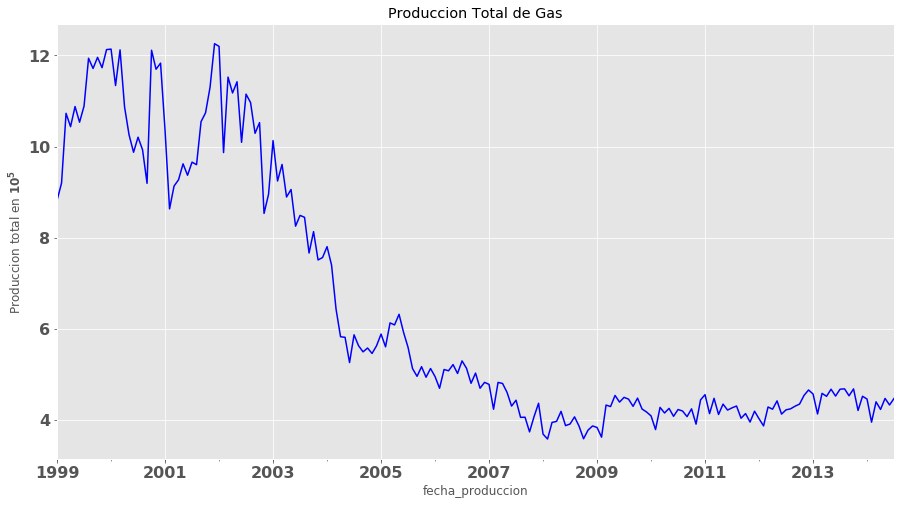

In [13]:
prod_total_liq = prod_mens.groupby('fecha_produccion')['VOLUMEN_DE_GAS_(m3)'].sum() / 1e5
prod_total_liq.plot(figsize=(15,8), title='Produccion Total de Gas', color='b')
plt.ylabel('Produccion total en $10^5$')

In [14]:
prod_mens.columns

Index(['index', 'NOMBRE_DEL_POZO', 'CIMA_INTERVALO_(md)',
       'BASE_INTERVALO_(md)', 'CONDICION_DE_FLUJO_(Fluyente/SAP)',
       'FECHA_DE_LA_PRODUCCION_(dd/mm/aaaa)', 'RELACION_GAS_LIQUIDO_(m3/m3)',
       'RELACION_GAS_ACEITE_(m3/m3)', 'CORTE_DE_AGUA_(bl/bl)',
       'SALINIDAD_(PPM)', 'RELACION_AGUA_ACEITE_(m3/m3)',
       'RELACION_CONDENSADO_GAS_(m3/m3)', 'RELACION_AGUA_GAS_(m3/m3)',
       'RELACION_AGUA_CONDENSADO_(m3/m3)', 'FRACCION_DEL_SEDIMENTO',
       'DIAMETRO_DEL_ESTRANGULADOR _(in)', 'VOLUMEN_DE_ACEITE_(m3)',
       'VOLUMEN_DE_GAS_(m3)', 'VOLUMEN_DE_CONDENSADO_(m3)',
       'DIAS_DE_PRODUCCION ', 'DESCRIPCION_DE_LA_PRODUCCION ',
       'fecha_produccion'],
      dtype='object')

# Tabla DB_produccion_Moloacan

Tabla con historico de produccion en unidades de barriles mensuales

    Fecha - Fecha de registro
    Pozo -  Nombre del pozo
    Dias - Numero de dias del mes en curso
    Qo_mes_b - Numero de Barriles de Oil mensuales
    Qo_prom_mesbd - Promedio de barriles diarios Qo_mes_b / Dias
    Qg_mes_MMpc - 
    Qg_prom_mes_MMpcd - Qg_mes_MMpc / Dias
    Qw_mes_b - Numero de barriles de agua mensual
    Qw_prom_mes_bd - Promedio de barriles mensuales de agua  Qw_mes_b / Dias
    Fw_% - Porcentaje de Agua
    RGA_m3/m3 - Relacion Gas Aceite
    Dias_de_Operacion - Dias que estuvo operando la plataforma

In [15]:
db_prod_mol = pd.read_csv('DB_prod_moloacan.csv')
db_prod_mol.columns = db_prod_mol.columns.str.replace(" ","_").str.replace(
    "(","").str.replace(")","").str.replace(".","").str.replace('á',"a").str.replace('é',"e").str.replace(
    'í',"i").str.replace('ó',"o").str.replace('ú',"u")
# transfromaciones
db_prod_mol['Qo_mes_b'] = db_prod_mol['Qo_mes_b'].str.replace(',', '').astype(float)
db_prod_mol['Qw_mes_b'] = db_prod_mol['Qw_mes_b'].str.replace(',', '').astype(float)
db_prod_mol['RGA_m3/m3'] = db_prod_mol['RGA_m3/m3'].str.replace(',', '').astype(float)
db_prod_mol["Pozo"] = db_prod_mol.Pozo.str.replace("Á","A")

In [16]:
db_prod_mol.columns

Index(['Fecha', 'Pozo', 'Dias', 'Qo_mes_b', 'Qo_prom_mesbd', 'Qg_mes_MMpc',
       'Qg_prom_mes_MMpcd', 'Qw_mes_b', 'Qw_prom_mes_bd', 'Fw_%', 'RGA_m3/m3',
       'Dias_de_Operacion'],
      dtype='object')

In [17]:
db_prod_mol['fecha_produccion'] = pd.to_datetime(db_prod_mol.Fecha, format="%d/%m/%Y")

In [18]:
db_prod_mol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20886 entries, 0 to 20885
Data columns (total 13 columns):
Fecha                20886 non-null object
Pozo                 20886 non-null object
Dias                 20886 non-null int64
Qo_mes_b             20886 non-null float64
Qo_prom_mesbd        20886 non-null float64
Qg_mes_MMpc          20886 non-null float64
Qg_prom_mes_MMpcd    20886 non-null float64
Qw_mes_b             20886 non-null float64
Qw_prom_mes_bd       20886 non-null float64
Fw_%                 20886 non-null float64
RGA_m3/m3            20886 non-null float64
Dias_de_Operacion    20886 non-null int64
fecha_produccion     20886 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(2), object(2)
memory usage: 2.1+ MB


In [19]:
prod_mens.groupby('fecha_produccion').mean()['VOLUMEN_DE_ACEITE_(m3)'].head()

fecha_produccion
1999-01-01    56.658552
1999-02-01    47.592117
1999-03-01    55.794374
1999-04-01    54.945367
1999-05-01    56.702242
Name: VOLUMEN_DE_ACEITE_(m3), dtype: float64

In [20]:
db_prod_mol.groupby('fecha_produccion').mean()['Qo_mes_b'].head()

fecha_produccion
1999-01-01    356.382372
1999-02-01    299.353935
1999-03-01    350.946842
1999-04-01    345.607550
1999-05-01    356.656382
Name: Qo_mes_b, dtype: float64

Text(0, 0.5, 'Produccion promedio')

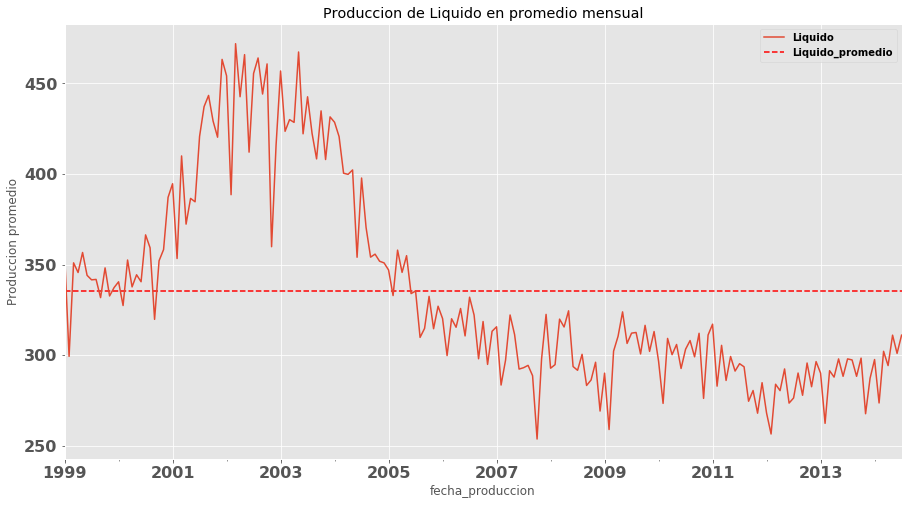

In [21]:
db_prod_mol.groupby('fecha_produccion').mean()['Qo_mes_b'].plot(figsize=(15,8), 
                                                             title='Produccion de Liquido en promedio mensual')
mi,ma = plt.xlim()
plt.hlines(db_prod_mol.groupby('fecha_produccion').mean()['Qo_mes_b'].mean(),
           mi, ma, color='r', linestyles='--')
plt.legend(['Liquido','Liquido_promedio'])
plt.ylabel('Produccion promedio')

Se producen por plataforma 330 barriles mensuales CHECAR!!

Text(0, 0.5, 'Produccion total')

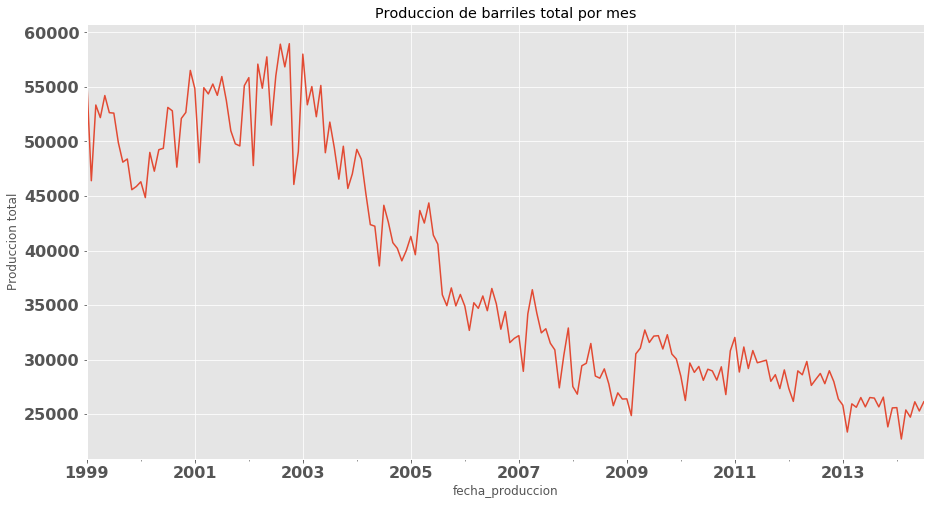

In [22]:
db_prod_mol.groupby('fecha_produccion').sum()['Qo_mes_b'].plot(figsize=(15,8), 
                                                             title='Produccion de barriles total por mes')

plt.ylabel('Produccion total')

444161.9031249999

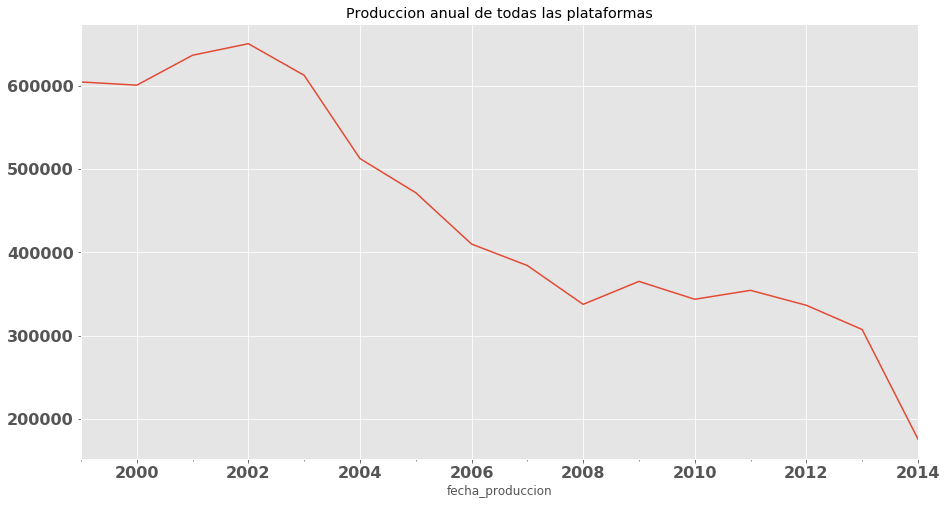

In [23]:
db_prod_mol.set_index('fecha_produccion').resample('Y').sum()['Qo_mes_b'].plot(figsize=(15,8), 
title='Produccion anual de todas las plataformas')
db_prod_mol.set_index('fecha_produccion').resample('Y').sum()['Qo_mes_b'].mean()

Anualmente se generan 444,000 barriles de petroleo CHECAR!!!

In [24]:
idx = db_prod_mol.Pozo.sample(3).values
sample = db_prod_mol[db_prod_mol.Pozo.isin(idx)]

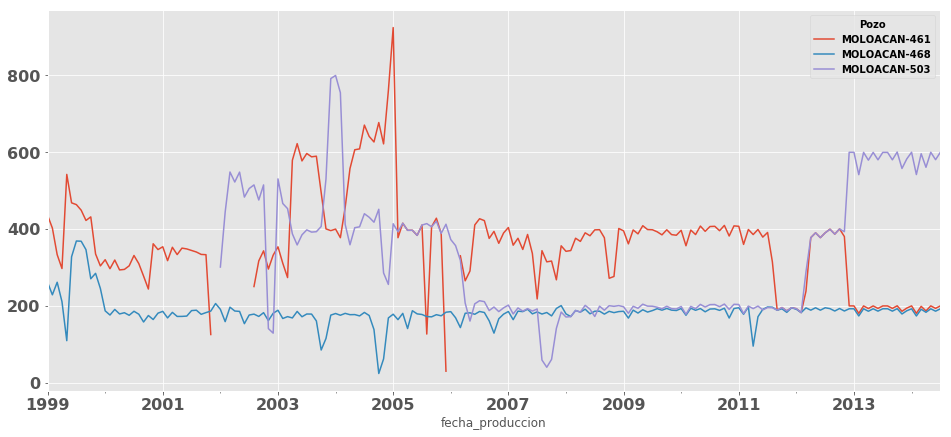

In [25]:
sample.groupby(['Pozo','fecha_produccion']).Qo_mes_b.sum().unstack(0).plot(figsize=(16,7))

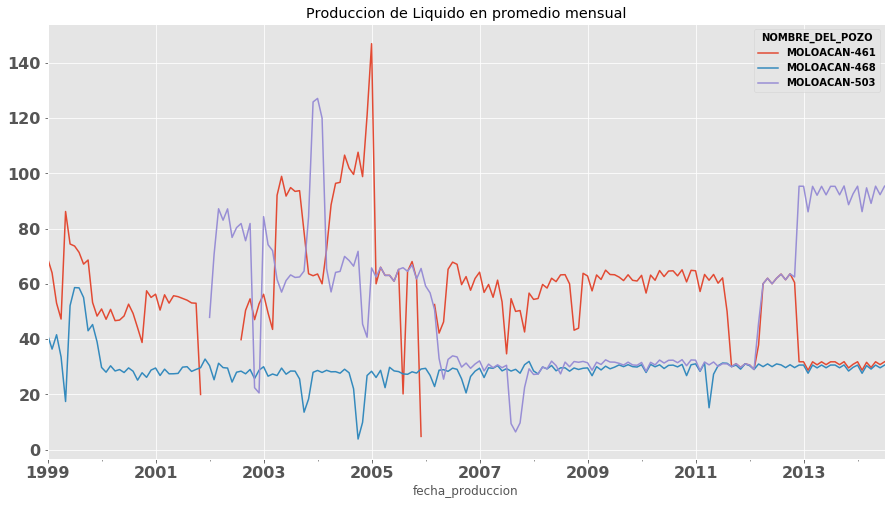

In [26]:
prod_mens[prod_mens.NOMBRE_DEL_POZO.isin(idx)].groupby(['NOMBRE_DEL_POZO','fecha_produccion'])[
    'VOLUMEN_DE_ACEITE_(m3)'].sum().unstack(0).plot(figsize=(15,8), 
    title='Produccion de Liquido en promedio mensual')

# Relacion entre barriles de petroleo y volumen de aceite

In [27]:
a = db_prod_mol[db_prod_mol.Pozo=='MOLOACAN-705'].groupby(['Pozo','fecha_produccion']).Qo_mes_b.sum()

In [28]:
b = prod_mens[prod_mens.NOMBRE_DEL_POZO=='MOLOACAN-705'].groupby(['NOMBRE_DEL_POZO','fecha_produccion'])[
    'VOLUMEN_DE_ACEITE_(m3)'].sum()

In [29]:
(a/b).mean()

6.289995674364903

In [30]:
(b/a).mean()

0.15898262132747365

# Numero de registros posibles para entrenamiento

In [31]:
print('Numero de plataformas: %i' % db_prod_mol.Pozo.nunique())

Numero de plataformas: 178


In [32]:
print('Numero de mediciones promedio por plataforma: %i' % db_prod_mol.groupby('Pozo').fecha_produccion.count().median())

Numero de mediciones promedio por plataforma: 124


In [33]:
a = 178 * 124

In [34]:
print('Alrededor de %i registros' % a)

Alrededor de 22072 registros


# Se estimara el numero de barriles mensuales

Se generan variables que expliquen la produccion en $P(t)$ con un historico de 6 meses con variables como $P(t-1), P(t-2), P(t-3)$

Se estima
$P(t) = \alpha + \beta_1 P(t-1)+ \beta_1 P(t-2)+ \beta_1 P(t-3)+ \beta_1 P(t-4)+ \beta_1 P(t-5)+ \beta_1 P(t-6) + \epsilon$

In [35]:
# tabla (t)
t = db_prod_mol.groupby(['Pozo','fecha_produccion']).Qo_mes_b.first()

# tabla (t + 1)
t_1 = db_prod_mol.groupby(['Pozo','fecha_produccion']).Qo_mes_b.first().shift(-1)

# tabla (t + 2)
t_2 = db_prod_mol.groupby(['Pozo','fecha_produccion']).Qo_mes_b.first().shift(-2)

# tabla (t + 3)
t_3 = db_prod_mol.groupby(['Pozo','fecha_produccion']).Qo_mes_b.first().shift(-3)

# tabla (t + 4)
t_4 = db_prod_mol.groupby(['Pozo','fecha_produccion']).Qo_mes_b.first().shift(-4)

# tabla (t + 4)
t_5 = db_prod_mol.groupby(['Pozo','fecha_produccion']).Qo_mes_b.first().shift(-5)

# tabla (t + 4)
t_6 = db_prod_mol.groupby(['Pozo','fecha_produccion']).Qo_mes_b.first().shift(-6)

Variables de produccion anterior, pensando que produciran semejante al mes anterior

In [36]:
df = pd.concat([t,t_1,t_2,t_3,t_4,t_5,t_6],1).dropna()
df.columns = ['Qomes_b_t_6','Qomes_b_t_5','Qomes_b_t_4',
              'Qomes_b_t_3','Qomes_b_t_2','Qomes_b_t_1','Qomes_b_t']

In [37]:
df.shape # numero de registros

(20880, 7)

In [38]:
df['diff_t_6_t_5'] = df.Qomes_b_t_6 - df.Qomes_b_t_5
df['diff_t_5_t_4'] = df.Qomes_b_t_5 - df.Qomes_b_t_4
df['diff_t_4_t_3'] = df.Qomes_b_t_4 - df.Qomes_b_t_3
df['diff_t_3_t_2'] = df.Qomes_b_t_3 - df.Qomes_b_t_2
df['diff_t_2_t_1'] = df.Qomes_b_t_2 - df.Qomes_b_t_1

Variables de diferencia entre periodos, como una velocidad de produccion entre un mes y otro.

In [39]:
df['std_t_6_t_1'] = df[['Qomes_b_t_6','Qomes_b_t_5','Qomes_b_t_4','Qomes_b_t_3','Qomes_b_t_2','Qomes_b_t_1']].std(1)
df['mean_t_6_t_1'] = df[['Qomes_b_t_6','Qomes_b_t_5','Qomes_b_t_4','Qomes_b_t_3','Qomes_b_t_2','Qomes_b_t_1']].mean(1)
df['median_t_6_t_1'] = df[['Qomes_b_t_6','Qomes_b_t_5','Qomes_b_t_4','Qomes_b_t_3','Qomes_b_t_2','Qomes_b_t_1']].median(1)
df['min_t_6_t_1'] = df[['Qomes_b_t_6','Qomes_b_t_5','Qomes_b_t_4','Qomes_b_t_3','Qomes_b_t_2','Qomes_b_t_1']].min(1)
df['max_t_6_t_1'] = df[['Qomes_b_t_6','Qomes_b_t_5','Qomes_b_t_4','Qomes_b_t_3','Qomes_b_t_2','Qomes_b_t_1']].max(1)

Variables estadisticas sobre el historico de 6 meses.
+ std si varia mucho puede que ayude a predecir la produccion
+ median, mean es probable que produzca al menos el promedio que ha producido antes
+ min Si ya paso por un bache de produccion puede indicarnos si seguira ahi... NO ESTOY SEGURO
+ max Si esta en un pico de produccion o ya lo paso, al menos no va a sobrepasar este valor

In [40]:
# tabla (t)
t = db_prod_mol.groupby(['Pozo','fecha_produccion']).Dias_de_Operacion.first()

# tabla (t + 1)
t_1 = db_prod_mol.groupby(['Pozo','fecha_produccion']).Dias_de_Operacion.first().shift(-1)

# tabla (t + 2)
t_2 = db_prod_mol.groupby(['Pozo','fecha_produccion']).Dias_de_Operacion.first().shift(-2)

# tabla (t + 3)
t_3 = db_prod_mol.groupby(['Pozo','fecha_produccion']).Dias_de_Operacion.first().shift(-3)

# tabla (t + 4)
t_4 = db_prod_mol.groupby(['Pozo','fecha_produccion']).Dias_de_Operacion.first().shift(-4)

# tabla (t + 5)
t_5 = db_prod_mol.groupby(['Pozo','fecha_produccion']).Dias_de_Operacion.first().shift(-5)

In [41]:
df_days = pd.concat([t,t_1,t_2,t_3,t_4,t_5],1).dropna()
df_days.columns = ['Dias_de_Operacion_t_6','Dias_de_Operacion_t_5','Dias_de_Operacion_t_4',
              'Dias_de_Operacion_t_3','Dias_de_Operacion_t_2','Dias_de_Operacion_t_1']

In [42]:
df = pd.merge(df, df_days, right_index=True, left_index=True)

In [43]:
df.head(8)

Qomes_b_t_6  Qomes_b_t_5  Qomes_b_t_4  \
Pozo          fecha_produccion                                          
MOLOACAN-1004 2002-06-01              73.46       130.81       558.79   
              2002-07-01             130.81       558.79       559.27   
              2002-08-01             558.79       559.27       584.45   
              2002-09-01             559.27       584.45        57.85   
              2002-10-01             584.45        57.85       458.72   
              2002-11-01              57.85       458.72       512.86   
              2003-01-01             458.72       512.86       448.65   
              2003-02-01             512.86       448.65       179.38   

                                Qomes_b_t_3  Qomes_b_t_2  Qomes_b_t_1  \
Pozo          fecha_produccion                                          
MOLOACAN-1004 2002-06-01             559.27       584.45        57.85   
              2002-07-01             584.45        57.85       458.72   
              2002-08-01              57.85       458.72       512.86   
              2002-09-01             458.72       512.86       448.65   
              2002-10-01             512.86       448.65       179.38   
              2002-11-01             448.65       179.38       160.86   
              2003-01-01             179.38       160.86       141.21   
              2003-02-01             160.86       141.21       183.79   

                                Qomes_b_t  diff_t_6_t_5  diff_t_5_t_4  \
Pozo          fecha_produccion                                          
MOLOACAN-1004 2002-06-01           458.72        -57.35       -427.98   
              2002-07-01           512.86       -427.98         -0.48   
              2002-08-01           448.65         -0.48        -25.18   
              2002-09-01           179.38        -25.18        526.60   
              2002-10-01           160.86        526.60       -400.87   
              2002-11-01           141.21       -400.87        -54.14   
              2003-01-01           183.79        -54.14         64.21   
              2003-02-01           180.44         64.21        269.27   

                                diff_t_4_t_3  ...  mean_t_6_t_1  \
Pozo          fecha_produccion                ...                 
MOLOACAN-1004 2002-06-01               -0.48  ...    327.438333   
              2002-07-01              -25.18  ...    391.648333   
              2002-08-01              526.60  ...    455.323333   
              2002-09-01             -400.87  ...    436.966667   
              2002-10-01              -54.14  ...    373.651667   
              2002-11-01               64.21  ...    303.053333   
              2003-01-01              269.27  ...    316.946667   
              2003-02-01               18.52  ...    271.125000   

                                median_t_6_t_1  min_t_6_t_1  max_t_6_t_1  \
Pozo          fecha_produccion                                             
MOLOACAN-1004 2002-06-01               344.800        57.85       584.45   
              2002-07-01               508.755        57.85       584.45   
              2002-08-01               535.825        57.85       584.45   
              2002-09-01               485.790        57.85       584.45   
              2002-10-01               453.685        57.85       584.45   
              2002-11-01               314.015        57.85       512.86   
              2003-01-01               314.015       141.21       512.86   
              2003-02-01               181.585       141.21       512.86   

                                Dias_de_Operacion_t_6  Dias_de_Operacion_t_5  \
Pozo          fecha_produccion                                                 
MOLOACAN-1004 2002-06-01                            4                    7.0   
              2002-07-01                            7                   30.0   
              2002-08-01                           30                   30.0   
       

In [44]:
dummi_month = pd.get_dummies(df.reset_index().fecha_produccion.dt.month, prefix='month_').set_index(df.index)

## Generar Dummie por mes para agarrar clima PENDIENTE
## Generar pico historico
## Si estuvo detenido

In [45]:
df_train = df.reset_index()

# AED

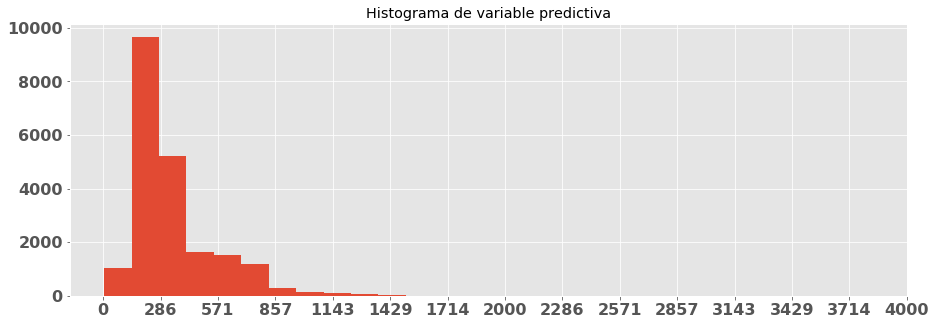

In [46]:
df_train.Qomes_b_t.hist(bins=25, figsize=(15,5))
plt.title('Histograma de variable predictiva')
plt.xticks(np.linspace(0,4000,15));

## Se tiene que probar predecir con logaritmo de produccion

In [47]:
df_train["Qomes_b_t_log"] = np.log(1 + df_train.Qomes_b_t)

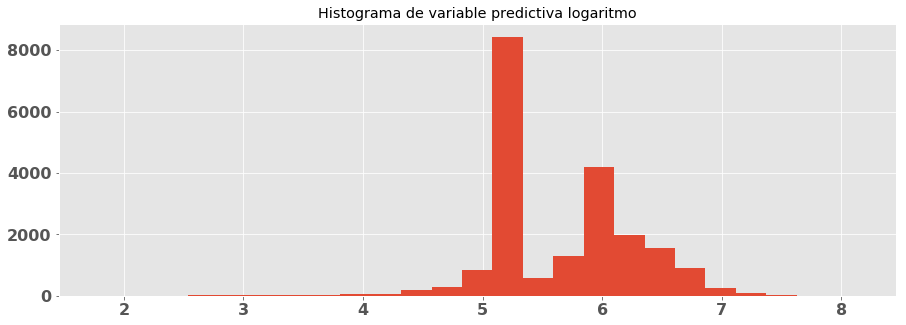

In [48]:
df_train.Qomes_b_t_log.hist(bins=25, figsize=(15,5))
plt.title('Histograma de variable predictiva logaritmo');

# Dispersiones

In [49]:
df_train.columns

Index(['Pozo', 'fecha_produccion', 'Qomes_b_t_6', 'Qomes_b_t_5', 'Qomes_b_t_4',
       'Qomes_b_t_3', 'Qomes_b_t_2', 'Qomes_b_t_1', 'Qomes_b_t',
       'diff_t_6_t_5', 'diff_t_5_t_4', 'diff_t_4_t_3', 'diff_t_3_t_2',
       'diff_t_2_t_1', 'std_t_6_t_1', 'mean_t_6_t_1', 'median_t_6_t_1',
       'min_t_6_t_1', 'max_t_6_t_1', 'Dias_de_Operacion_t_6',
       'Dias_de_Operacion_t_5', 'Dias_de_Operacion_t_4',
       'Dias_de_Operacion_t_3', 'Dias_de_Operacion_t_2',
       'Dias_de_Operacion_t_1', 'Qomes_b_t_log'],
      dtype='object')

In [50]:
num_cols = ['Qomes_b_t_6', 'Qomes_b_t_5', 'Qomes_b_t_4',
       'Qomes_b_t_3', 'Qomes_b_t_2', 'Qomes_b_t_1',
       'diff_t_6_t_5', 'diff_t_5_t_4', 'diff_t_4_t_3', 'diff_t_3_t_2',
       'diff_t_2_t_1', 'std_t_6_t_1', 'mean_t_6_t_1', 'median_t_6_t_1',
       'min_t_6_t_1', 'max_t_6_t_1', 'Dias_de_Operacion_t_6',
       'Dias_de_Operacion_t_5', 'Dias_de_Operacion_t_4',
       'Dias_de_Operacion_t_3', 'Dias_de_Operacion_t_2',
       'Dias_de_Operacion_t_1']

C:\Users\Daniel\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


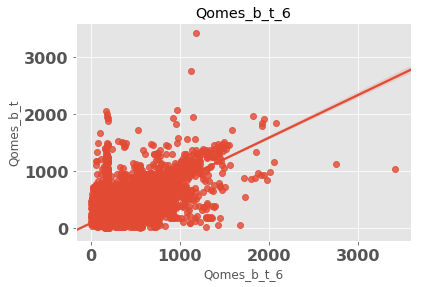

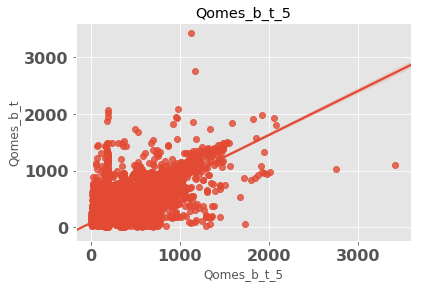

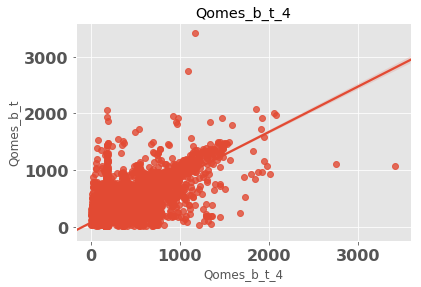

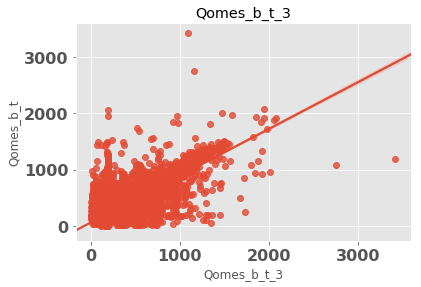

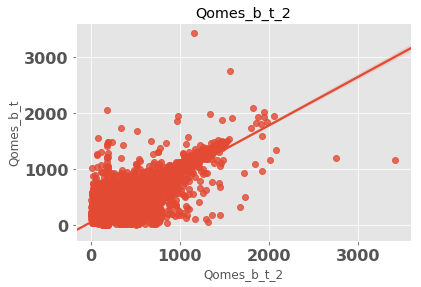

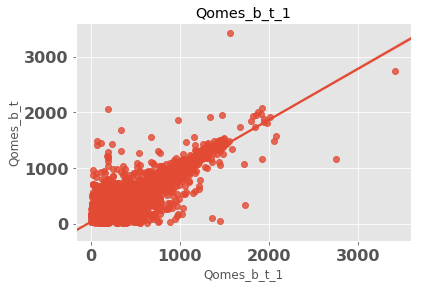

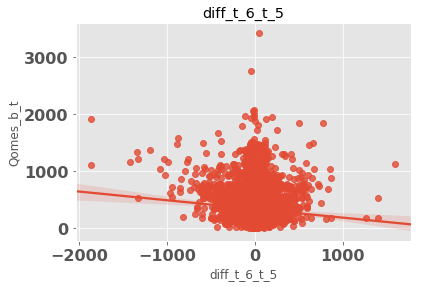

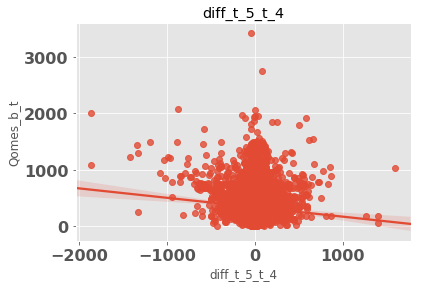

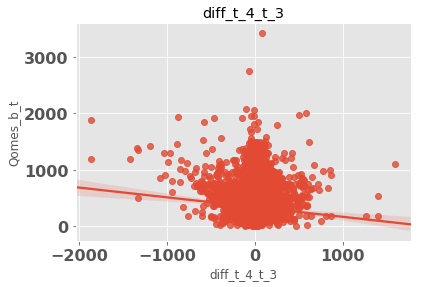

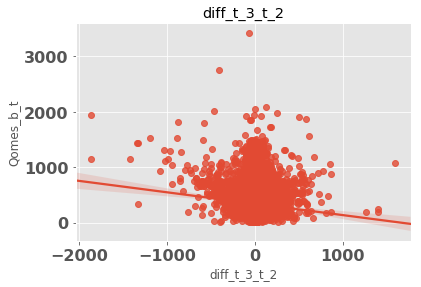

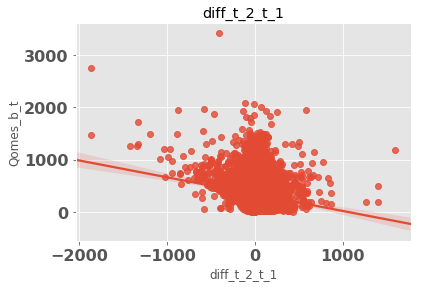

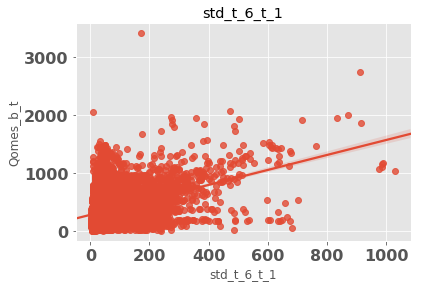

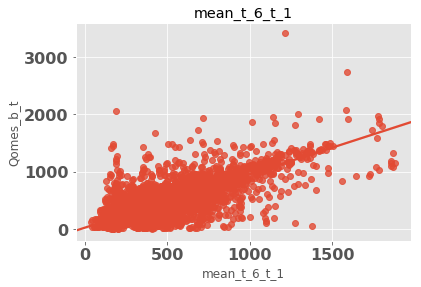

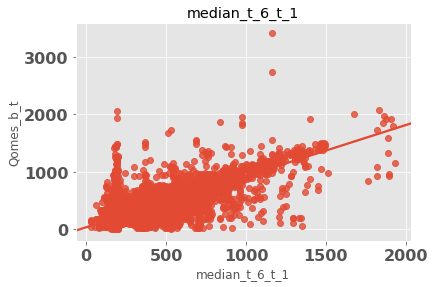

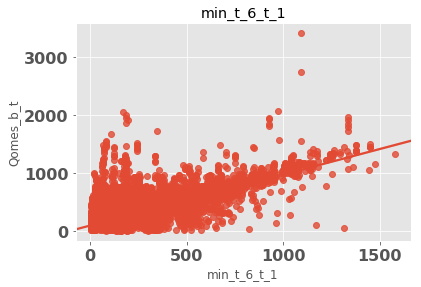

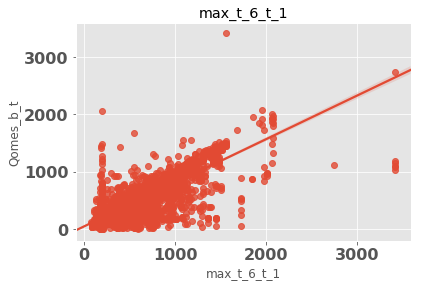

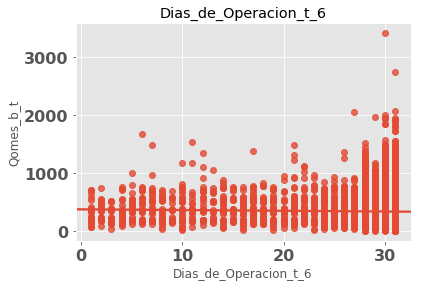

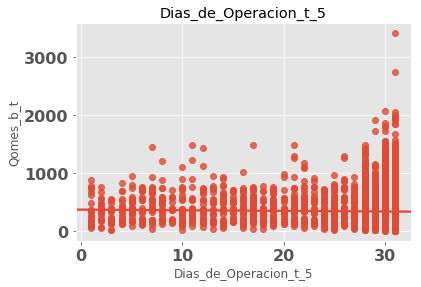

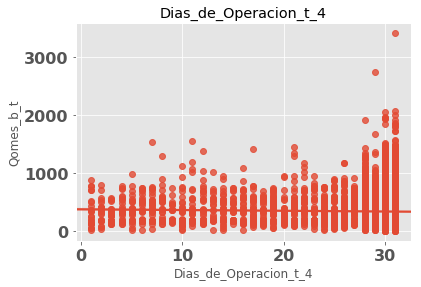

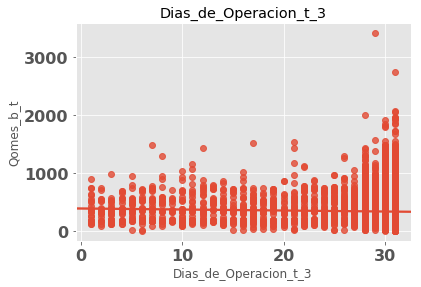

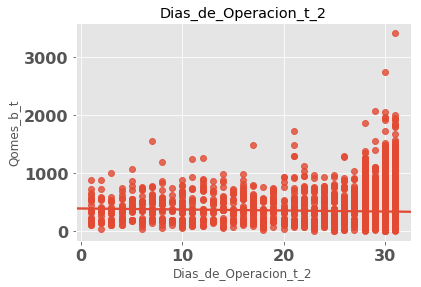

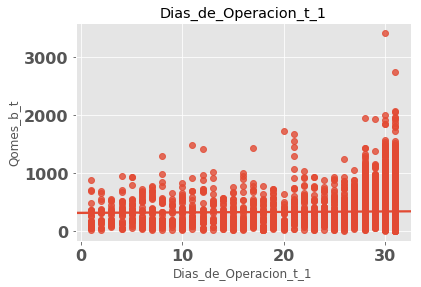

In [51]:
for i in df_train[num_cols].columns:
    plt.subplots()
    sns.regplot(df_train[i],df_train.Qomes_b_t)
    plt.title(i)

En algunas dispersiones vemos que hay como dos conjuntos que se comportan distinto... posible crear variables

### Correlacion con respecto a mi variable predictiva

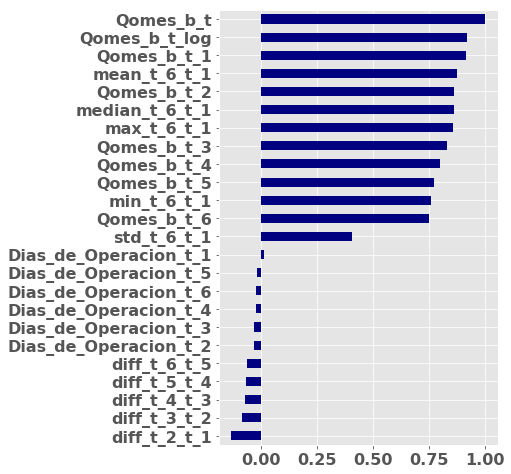

In [52]:
df_train.corrwith(df_train.Qomes_b_t).sort_values().plot.barh(color='navy', figsize=(5,8))

# Entrenamiento

In [53]:
# Modelos
#import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier

# metricas de evaluacion
from sklearn.metrics import (roc_auc_score, classification_report, confusion_matrix,
                            roc_curve, accuracy_score)
# lo mismo pero en grafico
import scikitplot as skplt

# Interpretacion
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import shap

In [54]:
df_train.columns

Index(['Pozo', 'fecha_produccion', 'Qomes_b_t_6', 'Qomes_b_t_5', 'Qomes_b_t_4',
       'Qomes_b_t_3', 'Qomes_b_t_2', 'Qomes_b_t_1', 'Qomes_b_t',
       'diff_t_6_t_5', 'diff_t_5_t_4', 'diff_t_4_t_3', 'diff_t_3_t_2',
       'diff_t_2_t_1', 'std_t_6_t_1', 'mean_t_6_t_1', 'median_t_6_t_1',
       'min_t_6_t_1', 'max_t_6_t_1', 'Dias_de_Operacion_t_6',
       'Dias_de_Operacion_t_5', 'Dias_de_Operacion_t_4',
       'Dias_de_Operacion_t_3', 'Dias_de_Operacion_t_2',
       'Dias_de_Operacion_t_1', 'Qomes_b_t_log'],
      dtype='object')

In [55]:
#x_train, x_test, x_valid, y_train, y_test, y_valid = st.train_test_valid_split(df, num_cols, 'Qomes_b_t')

In [56]:
import h2o

In [57]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,3 hours 51 mins
H2O cluster timezone:,America/Mexico_City
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.1
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_Daniel_r3fdyy
H2O cluster total nodes:,1
H2O cluster free memory:,6.382 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [58]:
from h2o.automl import H2OAutoML

In [59]:
df_train.drop('Qomes_b_t_log',1,inplace=True)

In [60]:
df_train.columns

Index(['Pozo', 'fecha_produccion', 'Qomes_b_t_6', 'Qomes_b_t_5', 'Qomes_b_t_4',
       'Qomes_b_t_3', 'Qomes_b_t_2', 'Qomes_b_t_1', 'Qomes_b_t',
       'diff_t_6_t_5', 'diff_t_5_t_4', 'diff_t_4_t_3', 'diff_t_3_t_2',
       'diff_t_2_t_1', 'std_t_6_t_1', 'mean_t_6_t_1', 'median_t_6_t_1',
       'min_t_6_t_1', 'max_t_6_t_1', 'Dias_de_Operacion_t_6',
       'Dias_de_Operacion_t_5', 'Dias_de_Operacion_t_4',
       'Dias_de_Operacion_t_3', 'Dias_de_Operacion_t_2',
       'Dias_de_Operacion_t_1'],
      dtype='object')

In [61]:
# pasar DataFrame a un objeto de h2o
dfh=h2o.H2OFrame(df_train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [62]:
y='Qomes_b_t'

In [63]:
# separar datos en train y test sets
splits = dfh.split_frame(ratios = [0.8,0.1], seed = 1)
train = splits[0]
test = splits[1]
valid = splits[2]

In [64]:
df_train.columns

Index(['Pozo', 'fecha_produccion', 'Qomes_b_t_6', 'Qomes_b_t_5', 'Qomes_b_t_4',
       'Qomes_b_t_3', 'Qomes_b_t_2', 'Qomes_b_t_1', 'Qomes_b_t',
       'diff_t_6_t_5', 'diff_t_5_t_4', 'diff_t_4_t_3', 'diff_t_3_t_2',
       'diff_t_2_t_1', 'std_t_6_t_1', 'mean_t_6_t_1', 'median_t_6_t_1',
       'min_t_6_t_1', 'max_t_6_t_1', 'Dias_de_Operacion_t_6',
       'Dias_de_Operacion_t_5', 'Dias_de_Operacion_t_4',
       'Dias_de_Operacion_t_3', 'Dias_de_Operacion_t_2',
       'Dias_de_Operacion_t_1'],
      dtype='object')

In [73]:
train.columns

['Pozo',
 'fecha_produccion',
 'Qomes_b_t_6',
 'Qomes_b_t_5',
 'Qomes_b_t_4',
 'Qomes_b_t_3',
 'Qomes_b_t_2',
 'Qomes_b_t_1',
 'Qomes_b_t',
 'diff_t_6_t_5',
 'diff_t_5_t_4',
 'diff_t_4_t_3',
 'diff_t_3_t_2',
 'diff_t_2_t_1',
 'std_t_6_t_1',
 'mean_t_6_t_1',
 'median_t_6_t_1',
 'min_t_6_t_1',
 'max_t_6_t_1',
 'Dias_de_Operacion_t_6',
 'Dias_de_Operacion_t_5',
 'Dias_de_Operacion_t_4',
 'Dias_de_Operacion_t_3',
 'Dias_de_Operacion_t_2',
 'Dias_de_Operacion_t_1']

In [74]:
# definición de los algoritmos, correr algoritmos
aml = H2OAutoML(max_runtime_secs = 30, seed = 1,
                project_name = "oil_production",
                sort_metric='MAE')
aml.train(y = y, 
          training_frame = train,
          validation_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [75]:
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20190729_172129,6569.88,81.0548,6569.88,33.192,0.286671
StackedEnsemble_BestOfFamily_AutoML_20190729_172129,6569.88,81.0548,6569.88,33.192,0.286671
DRF_1_AutoML_20190729_172129,6933.76,83.2692,6933.76,33.8065,0.289144
GBM_1_AutoML_20190729_172129,6964.79,83.4553,6964.79,34.9786,0.290559
GLM_grid_1_AutoML_20190729_172129_model_1,6772.1,82.2928,6772.1,35.2391,0.290803


In [76]:
aml.leader.model_performance(test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 5600.88516929578
RMSE: 74.83906178791781
MAE: 32.619718707629914
RMSLE: 0.278931104529008
R^2: 0.8844355568434527
Mean Residual Deviance: 5600.88516929578
Null degrees of freedom: 2026
Residual degrees of freedom: 2023
Null deviance: 98241364.52200183
Residual deviance: 11352994.238162545
AIC: 23256.765032082163


In [77]:
lb=aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20190729_172129,6569.88,81.0548,6569.88,33.192,0.286671
StackedEnsemble_BestOfFamily_AutoML_20190729_172129,6569.88,81.0548,6569.88,33.192,0.286671
DRF_1_AutoML_20190729_172129,6933.76,83.2692,6933.76,33.8065,0.289144
GBM_1_AutoML_20190729_172129,6964.79,83.4553,6964.79,34.9786,0.290559
GLM_grid_1_AutoML_20190729_172129_model_1,6772.1,82.2928,6772.1,35.2391,0.290803


In [78]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190729_172129

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 2841.9799304186213
RMSE: 53.31022350749077
MAE: 24.027027915009946
RMSLE: 0.23432700863352432
R^2: 0.9418597732307559
Mean Residual Deviance: 2841.9799304186213
Null degrees of freedom: 16784
Residual degrees of freedom: 16781
Null deviance: 820475525.8593113
Residual deviance: 47702633.13207656
AIC: 181122.3876630781

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 5600.88516929578
RMSE: 74.83906178791781
MAE: 32.619718707629914
RMSLE: 0.278931104529008
R^2: 0.8844355568434527
Mean Residual Deviance: 5600.88516929578
Null degrees of freedom: 2026
Residual degrees of freedom: 2023
Null deviance: 98241364.52200183
Residual deviance: 11352994.238162545
AIC: 23256.765032082163

ModelMetricsRegressionGLM: stackedensemble
*

# Evaluacion

In [79]:
y_pred = aml.predict(valid)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [80]:
from sklearn import metrics

In [94]:
# transformar h2o a un DataFrame
pred_pd = h2o.as_list(y_pred, use_pandas=True).values
qomes_pd = h2o.as_list(valid['Qomes_b_t'], use_pandas=True).values

In [95]:
print("La RAIZ del MSE %1.3f" % np.sqrt(metrics.mean_squared_error(qomes_pd,pred_pd)))
print("MAE %1.3f" % metrics.mean_absolute_error(qomes_pd,pred_pd))
print("R2 %1.3f" % metrics.r2_score(qomes_pd,pred_pd))

La RAIZ del MSE 76.878
MAE 32.534
R2 0.875


## Residuos

In [96]:
res = (qomes_pd,y_pred) / qomes_pd

ValueError: x and y must be the same size

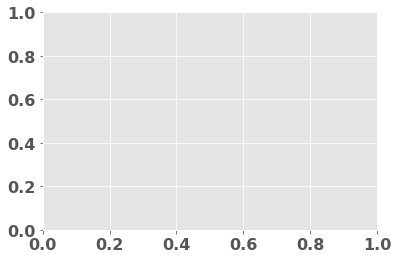

In [98]:
plt.scatter(qomes_pd, res, alpha=0.5)

# Interpretacion

In [ ]:
lgb.plot_importance(clf,max_num_features=10, title='Importancia de variables - Top 10')

In [ ]:
st.shap_interpretation(clf, x_valid)

# Generar Serie de tiempo

In [ ]:
idx = df_train.Pozo.sample(10)

In [ ]:
index = df_train[df_train.Pozo.isin(idx)].groupby(['Pozo','fecha_produccion']).Qomes_b_t.first().index

In [ ]:
validacion = df_train[df_train.Pozo.isin(idx)].groupby(['Pozo','fecha_produccion']).Qomes_b_t.first().unstack(0)

In [ ]:
prediction = clf.predict(df_train[df_train.Pozo.isin(idx)][num_cols])

In [ ]:
prediccion_validacion = pd.DataFrame(prediction,columns=['prediction']).set_index(index).unstack(0)

In [ ]:
ax = validacion.plot(figsize=(17,9),color='navy')
prediccion_validacion.plot(ax = ax,color='cyan')

In [ ]:
import plotly
import cufflinks

In [ ]:
pd.merge(validacion,prediccion_validacion,right_index=True, left_index=True).iplot()